# find wte0 and q0

In [1]:
import pandas as pd

In [2]:
q_buffer2_pair=pd.read_csv('../data/processed/q_buffer2_pair_test1.csv')

In [3]:


# Ensure 'date' is in datetime format
q_buffer2_pair['date'] = pd.to_datetime(q_buffer2_pair['date'])

# Sort by date to ensure chronological order
q_buffer2_pair = q_buffer2_pair.sort_values(by='date')

# Find the first occurrence of bfd=1 for each well and get the corresponding wte0 and q0
first_bfd_1 = q_buffer2_pair[q_buffer2_pair['bfd'] == 1].groupby('well_id').first().reset_index()

# Create a mapping of well_id to wte0 and q0
wte0_map = first_bfd_1.set_index('well_id')['wte'].to_dict()
q0_map = first_bfd_1.set_index('well_id')['q'].to_dict()

# Calculate delta_wte and delta_q directly in q_buffer2_pair
q_buffer2_pair['wte0'] = q_buffer2_pair['well_id'].map(wte0_map)
q_buffer2_pair['q0'] = q_buffer2_pair['well_id'].map(q0_map)


# compute the delta

In [4]:
q_buffer2_pair['delta_wte'] = q_buffer2_pair['wte'] - q_buffer2_pair['wte0']
q_buffer2_pair['delta_q'] = q_buffer2_pair['q'] - q_buffer2_pair['q0']

In [5]:
q_buffer2_pair

,well_id,date,wte,gse,gage_id,well_lat,well_lon,gage_lat,gage_lon,wte_meters,q,bfd,wte0,q0,delta_wte,delta_q
1312128,411605111481601,1932-08-08,4833.810000,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.345288,38.0,1.0,4833.810000,38.0,0.000000,0.0
1312129,411605111481601,1932-08-09,4833.807273,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.344457,38.0,1.0,4833.810000,38.0,-0.002727,0.0
1312130,411605111481601,1932-08-10,4833.804630,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.343651,34.0,1.0,4833.810000,38.0,-0.005370,-4.0
1312131,411605111481601,1932-08-11,4833.802070,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.342871,9.0,1.0,4833.810000,38.0,-0.007930,-29.0
1312132,411605111481601,1932-08-12,4833.799591,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.342115,9.0,1.0,4833.810000,38.0,-0.010409,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506807,413805111492201,2023-10-26,4752.164254,4813.0,10126000,41.634572,-111.823637,41.576321,-112.100782,1448.459665,846.0,1.0,4748.886038,437.0,3.278216,409.0
1506808,413805111492201,2023-10-29,4752.105379,4813.0,10126000,41.634572,-111.823637,41.576321,-112.100782,1448.441720,1040.0,1.0,4748.886038,437.0,3.219341,603.0
1640821,414236112101201,2023-10-29,4297.046028,4319.1,10126000,41.709928,-112.170786,41.576321,-112.100782,1309.739629,1040.0,1.0,4296.220505,382.0,0.825523,658.0
1640822,414236112101201,2023-11-01,4297.053004,4319.1,10126000,41.709928,-112.170786,41.576321,-112.100782,1309.741756,987.0,1.0,4296.220505,382.0,0.832498,605.0


In [6]:
# Drop the temporary columns if needed
q_buffer2_pair.drop(columns=['wte0', 'q0'], inplace=True)

# Display the resulting DataFrame with the new columns
q_buffer2_pair.head()

,well_id,date,wte,gse,gage_id,well_lat,well_lon,gage_lat,gage_lon,wte_meters,q,bfd,delta_wte,delta_q
1312128,411605111481601,1932-08-08,4833.810000,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.345288,38.0,1.0,0.000000,0.0
1312129,411605111481601,1932-08-09,4833.807273,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.344457,38.0,1.0,-0.002727,0.0
1312130,411605111481601,1932-08-10,4833.804630,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.343651,34.0,1.0,-0.005370,-4.0
1312131,411605111481601,1932-08-11,4833.802070,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.342871,9.0,1.0,-0.007930,-29.0
1312132,411605111481601,1932-08-12,4833.799591,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1473.342115,9.0,1.0,-0.010409,-29.0


In [7]:
q_buffer2_pair.to_csv('../data/features/q_buffer2_pair_delta_30m.csv', index=False)

# lag

## 1 year lag

In [ ]:
import pandas as pd

df = q_buffer2_pair.copy()
df['date'] = pd.to_datetime(df['date'])

# Calendar-year lag: same month/day last year (handles leap years more gracefully)
df['date_prev'] = df['date'] - pd.DateOffset(years=1)

lookup = df[['well_id', 'date', 'delta_wte']].rename(
    columns={'date': 'date_prev', 'delta_wte': 'delta_wte_lag1_year'}
)

# Use inner join to only include pairs where 1-year-ago data exists
lag_analysis_cal = df.merge(lookup, on=['well_id','date_prev'], how='inner')

In [8]:
lag_analysis_cal.head()

,well_id,date,wte,gse,gage_id,well_lat,well_lon,gage_lat,gage_lon,wte_meters,q,bfd,delta_wte,delta_q,date_prev,delta_wte_lag1_year
483,411605111481601,1933-08-08,4830.264808,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.264713,16.0,1.0,-3.545192,-22.0,1932-08-08,0.000000
486,411605111481601,1933-08-09,4830.250000,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.260200,15.0,1.0,-3.560000,-23.0,1932-08-09,-0.002727
490,411605111481601,1933-08-10,4830.230000,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.254104,14.0,1.0,-3.580000,-24.0,1932-08-10,-0.005370
497,411605111481601,1933-08-11,4830.205238,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.246557,12.0,1.0,-3.604762,-26.0,1932-08-11,-0.007930
501,411605111481601,1933-08-12,4830.178571,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1472.238429,12.0,1.0,-3.631429,-26.0,1932-08-12,-0.010409


In [23]:
lag_analysis_cal.to_csv('../data/features/q_buffer2_pair_lag.csv', index=False)

## 2 years lag

In [11]:
import pandas as pd

df = q_buffer2_pair.copy()
df['date'] = pd.to_datetime(df['date'])

# Calendar-year lag: same month/day last year (handles leap years more gracefully)
df['date_2yr'] = df['date'] - pd.DateOffset(years=2)

lookup = df[['well_id', 'date', 'delta_wte']].rename(
    columns={'date': 'date_2yr', 'delta_wte': 'delta_wte_lag2_year'}
)

# Use inner join to only include pairs where 2-year-ago data exists
lag_2yr = df.merge(lookup, on=['well_id','date_2yr'], how='inner')

In [12]:
lag_2yr.head()

,well_id,date,wte,gse,gage_id,well_lat,well_lon,gage_lat,gage_lon,wte_meters,q,bfd,delta_wte,delta_q,date_2yr,delta_wte_lag2_year
0,411605111481601,1934-08-08,4828.144689,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1471.618501,1.0,1.0,-5.665311,-37.0,1932-08-08,0.000000
1,411605111481601,1934-08-09,4828.134621,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1471.615433,1.0,1.0,-5.675379,-37.0,1932-08-09,-0.002727
2,411605111481601,1934-08-10,4828.124830,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1471.612448,1.0,1.0,-5.685170,-37.0,1932-08-10,-0.005370
3,411605111481601,1934-08-11,4828.115318,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1471.609549,1.0,1.0,-5.694682,-37.0,1932-08-11,-0.007930
4,411605111481601,1934-08-12,4828.106086,4840.0,10141000,41.267997,-111.805216,41.278277,-112.091887,1471.606735,1.0,1.0,-5.703914,-37.0,1932-08-12,-0.010409


In [13]:
lag_2yr.to_csv('../data/features/q_buffer2_pair_lag_2yr.csv', index=False)

## 3 years lag

In [35]:
import pandas as pd

df = q_buffer2_pair.copy()
df['date'] = pd.to_datetime(df['date'])

# Calendar-year lag: same month/day last year (handles leap years more gracefully)
df['date_3yr'] = df['date'] - pd.DateOffset(years=3)

lookup = df[['well_id', 'date', 'delta_wte']].rename(
    columns={'date': 'date_3yr', 'delta_wte': 'delta_wte_lag3_year'}
)

# Use inner join to only include pairs where 2-year-ago data exists
lag_3yr = df.merge(lookup, on=['well_id','date_3yr'], how='inner')

In [36]:
lag_3yr.to_csv('../data/features/q_buffer2_pair_lag_3yr.csv', index=False)

## 6 months lag

In [26]:
import pandas as pd

df = q_buffer2_pair.copy()
df['date'] = pd.to_datetime(df['date'])

# Calendar-year lag: same month/day last year (handles leap years more gracefully)
df['date_6mo'] = df['date'] - pd.DateOffset(months=6)

lookup = df[['well_id', 'date', 'delta_wte']].rename(
    columns={'date': 'date_6mo', 'delta_wte': 'delta_wte_lag6_months'}
)

# Use inner join to only include pairs where 2-year-ago data exists
lag_6mo = df.merge(lookup, on=['well_id','date_6mo'], how='inner')

In [27]:
lag_6mo.to_csv('../data/features/q_buffer2_pair_lag_6mo.csv', index=False)

## 3 months lag

In [28]:
import pandas as pd

df = q_buffer2_pair.copy()
df['date'] = pd.to_datetime(df['date'])

# Calendar-year lag: same month/day last year (handles leap years more gracefully)
df['date_3mo'] = df['date'] - pd.DateOffset(months=3)

lookup = df[['well_id', 'date', 'delta_wte']].rename(
    columns={'date': 'date_3mo', 'delta_wte': 'delta_wte_lag3_months'}
)

# Use inner join to only include pairs where 2-year-ago data exists
lag_3mo = df.merge(lookup, on=['well_id','date_3mo'], how='inner')

In [29]:
lag_3mo.to_csv('../data/features/q_buffer2_pair_lag_3mo.csv', index=False)

# Cross-Correlation Analysis (CCF) by Watershed

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.stats import pearsonr
import seaborn as sns

def calculate_ccf_by_watershed_extended(df, max_lag_years=10):
    """
    Calculate cross-correlation function between delta_q and delta_wte by watershed
    Extended version for longer lags (multiple years)
    
    Parameters:
    df: DataFrame with columns ['gage_id', 'well_id', 'date', 'delta_q', 'delta_wte']
    max_lag_years: Maximum lag to test in years
    
    Returns:
    Dictionary with gage_id as keys and CCF results as values
    """
    max_lag_days = max_lag_years * 365
    ccf_results = {}
    
    # Get unique watersheds
    watersheds = df['gage_id'].unique()
    
    print(f"Analyzing CCF for {len(watersheds)} watersheds with max lag of {max_lag_years} years...")
    
    for gage_id in watersheds:
        print(f"Processing watershed {gage_id}...")
        watershed_data = df[df['gage_id'] == gage_id].copy()
        
        # Get unique wells in this watershed
        wells = watershed_data['well_id'].unique()
        
        well_ccf_results = {}
        
        for well_id in wells:
            well_data = watershed_data[watershed_data['well_id'] == well_id].copy()
            
            # Sort by date
            well_data = well_data.sort_values('date')
            
            # Need sufficient data points for long-term analysis
            if len(well_data) < 365 * 3:  # At least 3 years of data
                continue
                
            # Remove any NaN values
            well_data = well_data.dropna(subset=['delta_q', 'delta_wte'])
            
            if len(well_data) < 365 * 3:
                continue
            
            # Calculate cross-correlation
            x = well_data['delta_q'].values
            y = well_data['delta_wte'].values
            
            # Standardize
            x = (x - np.mean(x)) / (np.std(x) + 1e-10)
            y = (y - np.mean(y)) / (np.std(y) + 1e-10)
            
            # Calculate CCF using scipy
            correlation = signal.correlate(y, x, mode='full')
            lags = signal.correlation_lags(len(y), len(x), mode='full')
            
            # Limit to max_lag_days
            valid_indices = np.abs(lags) <= max_lag_days
            correlation = correlation[valid_indices]
            lags = lags[valid_indices]
            
            # Normalize correlation
            correlation = correlation / len(x)
            
            well_ccf_results[well_id] = {
                'lags': lags,
                'correlation': correlation,
                'max_corr': np.max(np.abs(correlation)),
                'optimal_lag': lags[np.argmax(np.abs(correlation))],
                'optimal_corr': correlation[np.argmax(np.abs(correlation))],
                'n_points': len(well_data),
                'data_years': len(well_data) / 365.25
            }
        
        ccf_results[gage_id] = well_ccf_results
        print(f"  Processed {len(well_ccf_results)} wells with sufficient data")
    
    return ccf_results

# Calculate CCF for all watersheds with extended lag range
print("Starting extended CCF analysis...")
ccf_results_extended = calculate_ccf_by_watershed_extended(q_buffer2_pair, max_lag_years=10)

Starting extended CCF analysis...
Analyzing CCF for 6 watersheds with max lag of 10 years...
Processing watershed 10141000...
  Processed 172 wells with sufficient data
Processing watershed 10163000...
  Processed 84 wells with sufficient data
Processing watershed 10152000...
  Processed 23 wells with sufficient data
Processing watershed 10143500...
  Processed 5 wells with sufficient data
Processing watershed 10126000...
  Processed 274 wells with sufficient data
Processing watershed 10168000...
  Processed 19 wells with sufficient data


In [18]:
# Calculate overall CCF across all watersheds and individual watershed CCF
def calculate_overall_and_watershed_ccf(ccf_results_extended):
    """
    Calculate overall CCF across all watersheds and individual watershed CCF
    """
    # 1. Overall CCF across all watersheds
    print("Calculating overall CCF across all watersheds...")
    
    all_lags = []
    all_correlations = []
    all_optimal_lags = []
    all_max_correlations = []
    
    for gage_id, wells in ccf_results_extended.items():
        for well_id, result in wells.items():
            all_optimal_lags.append(result['optimal_lag'])
            all_max_correlations.append(result['max_corr'])
    
    overall_stats = {
        'n_wells_total': len(all_optimal_lags),
        'median_optimal_lag': np.median(all_optimal_lags),
        'mean_optimal_lag': np.mean(all_optimal_lags),
        'std_optimal_lag': np.std(all_optimal_lags),
        'median_max_corr': np.median(all_max_correlations),
        'mean_max_corr': np.mean(all_max_correlations),
        'optimal_lags': all_optimal_lags,
        'max_correlations': all_max_correlations
    }
    
    # 2. Individual watershed CCF summary
    print("Calculating individual watershed CCF...")
    
    watershed_summary = {}
    
    for gage_id, wells in ccf_results_extended.items():
        if not wells:
            continue
            
        optimal_lags = []
        max_correlations = []
        well_ids = []
        
        for well_id, result in wells.items():
            optimal_lags.append(result['optimal_lag'])
            max_correlations.append(result['max_corr'])
            well_ids.append(well_id)
        
        if optimal_lags:
            watershed_summary[gage_id] = {
                'n_wells': len(optimal_lags),
                'median_optimal_lag': np.median(optimal_lags),
                'mean_optimal_lag': np.mean(optimal_lags),
                'std_optimal_lag': np.std(optimal_lags),
                'median_max_corr': np.median(max_correlations),
                'mean_max_corr': np.mean(max_correlations),
                'optimal_lags': optimal_lags,
                'max_correlations': max_correlations,
                'well_ids': well_ids
            }
    
    return overall_stats, watershed_summary

# Calculate overall and watershed-specific results
overall_stats, watershed_summary = calculate_overall_and_watershed_ccf(ccf_results_extended)

# Display results
print("\n" + "="*60)
print("OVERALL CCF RESULTS ACROSS ALL WATERSHEDS")
print("="*60)
print(f"Total number of wells analyzed: {overall_stats['n_wells_total']}")
print(f"Overall median optimal lag: {overall_stats['median_optimal_lag']:.1f} days ({overall_stats['median_optimal_lag']/365.25:.2f} years)")
print(f"Overall mean optimal lag: {overall_stats['mean_optimal_lag']:.1f} ± {overall_stats['std_optimal_lag']:.1f} days")
print(f"Overall median max correlation: {overall_stats['median_max_corr']:.3f}")
print(f"Overall mean max correlation: {overall_stats['mean_max_corr']:.3f}")

print("\n" + "="*60)
print("WATERSHED-SPECIFIC CCF RESULTS")
print("="*60)
for gage_id, summary in watershed_summary.items():
    print(f"\nWatershed {gage_id}:")
    print(f"  Number of wells: {summary['n_wells']}")
    print(f"  Median optimal lag: {summary['median_optimal_lag']:.1f} days ({summary['median_optimal_lag']/365.25:.2f} years)")
    print(f"  Mean optimal lag: {summary['mean_optimal_lag']:.1f} ± {summary['std_optimal_lag']:.1f} days")
    print(f"  Median max correlation: {summary['median_max_corr']:.3f}")
    print(f"  Mean max correlation: {summary['mean_max_corr']:.3f}")

Calculating overall CCF across all watersheds...
Calculating individual watershed CCF...

OVERALL CCF RESULTS ACROSS ALL WATERSHEDS
Total number of wells analyzed: 577
Overall median optimal lag: 0.0 days (0.00 years)
Overall mean optimal lag: 15.1 ± 1173.5 days
Overall median max correlation: 0.210
Overall mean max correlation: 0.229

WATERSHED-SPECIFIC CCF RESULTS

Watershed 10141000:
  Number of wells: 172
  Median optimal lag: 0.0 days (0.00 years)
  Mean optimal lag: -8.6 ± 1121.8 days
  Median max correlation: 0.310
  Mean max correlation: 0.314

Watershed 10163000:
  Number of wells: 84
  Median optimal lag: 89.5 days (0.25 years)
  Mean optimal lag: 533.5 ± 1530.2 days
  Median max correlation: 0.220
  Mean max correlation: 0.226

Watershed 10152000:
  Number of wells: 23
  Median optimal lag: 19.0 days (0.05 years)
  Mean optimal lag: -126.3 ± 1492.8 days
  Median max correlation: 0.252
  Mean max correlation: 0.245

Watershed 10143500:
  Number of wells: 5
  Median optimal la

Creating correlation vs lag curves...


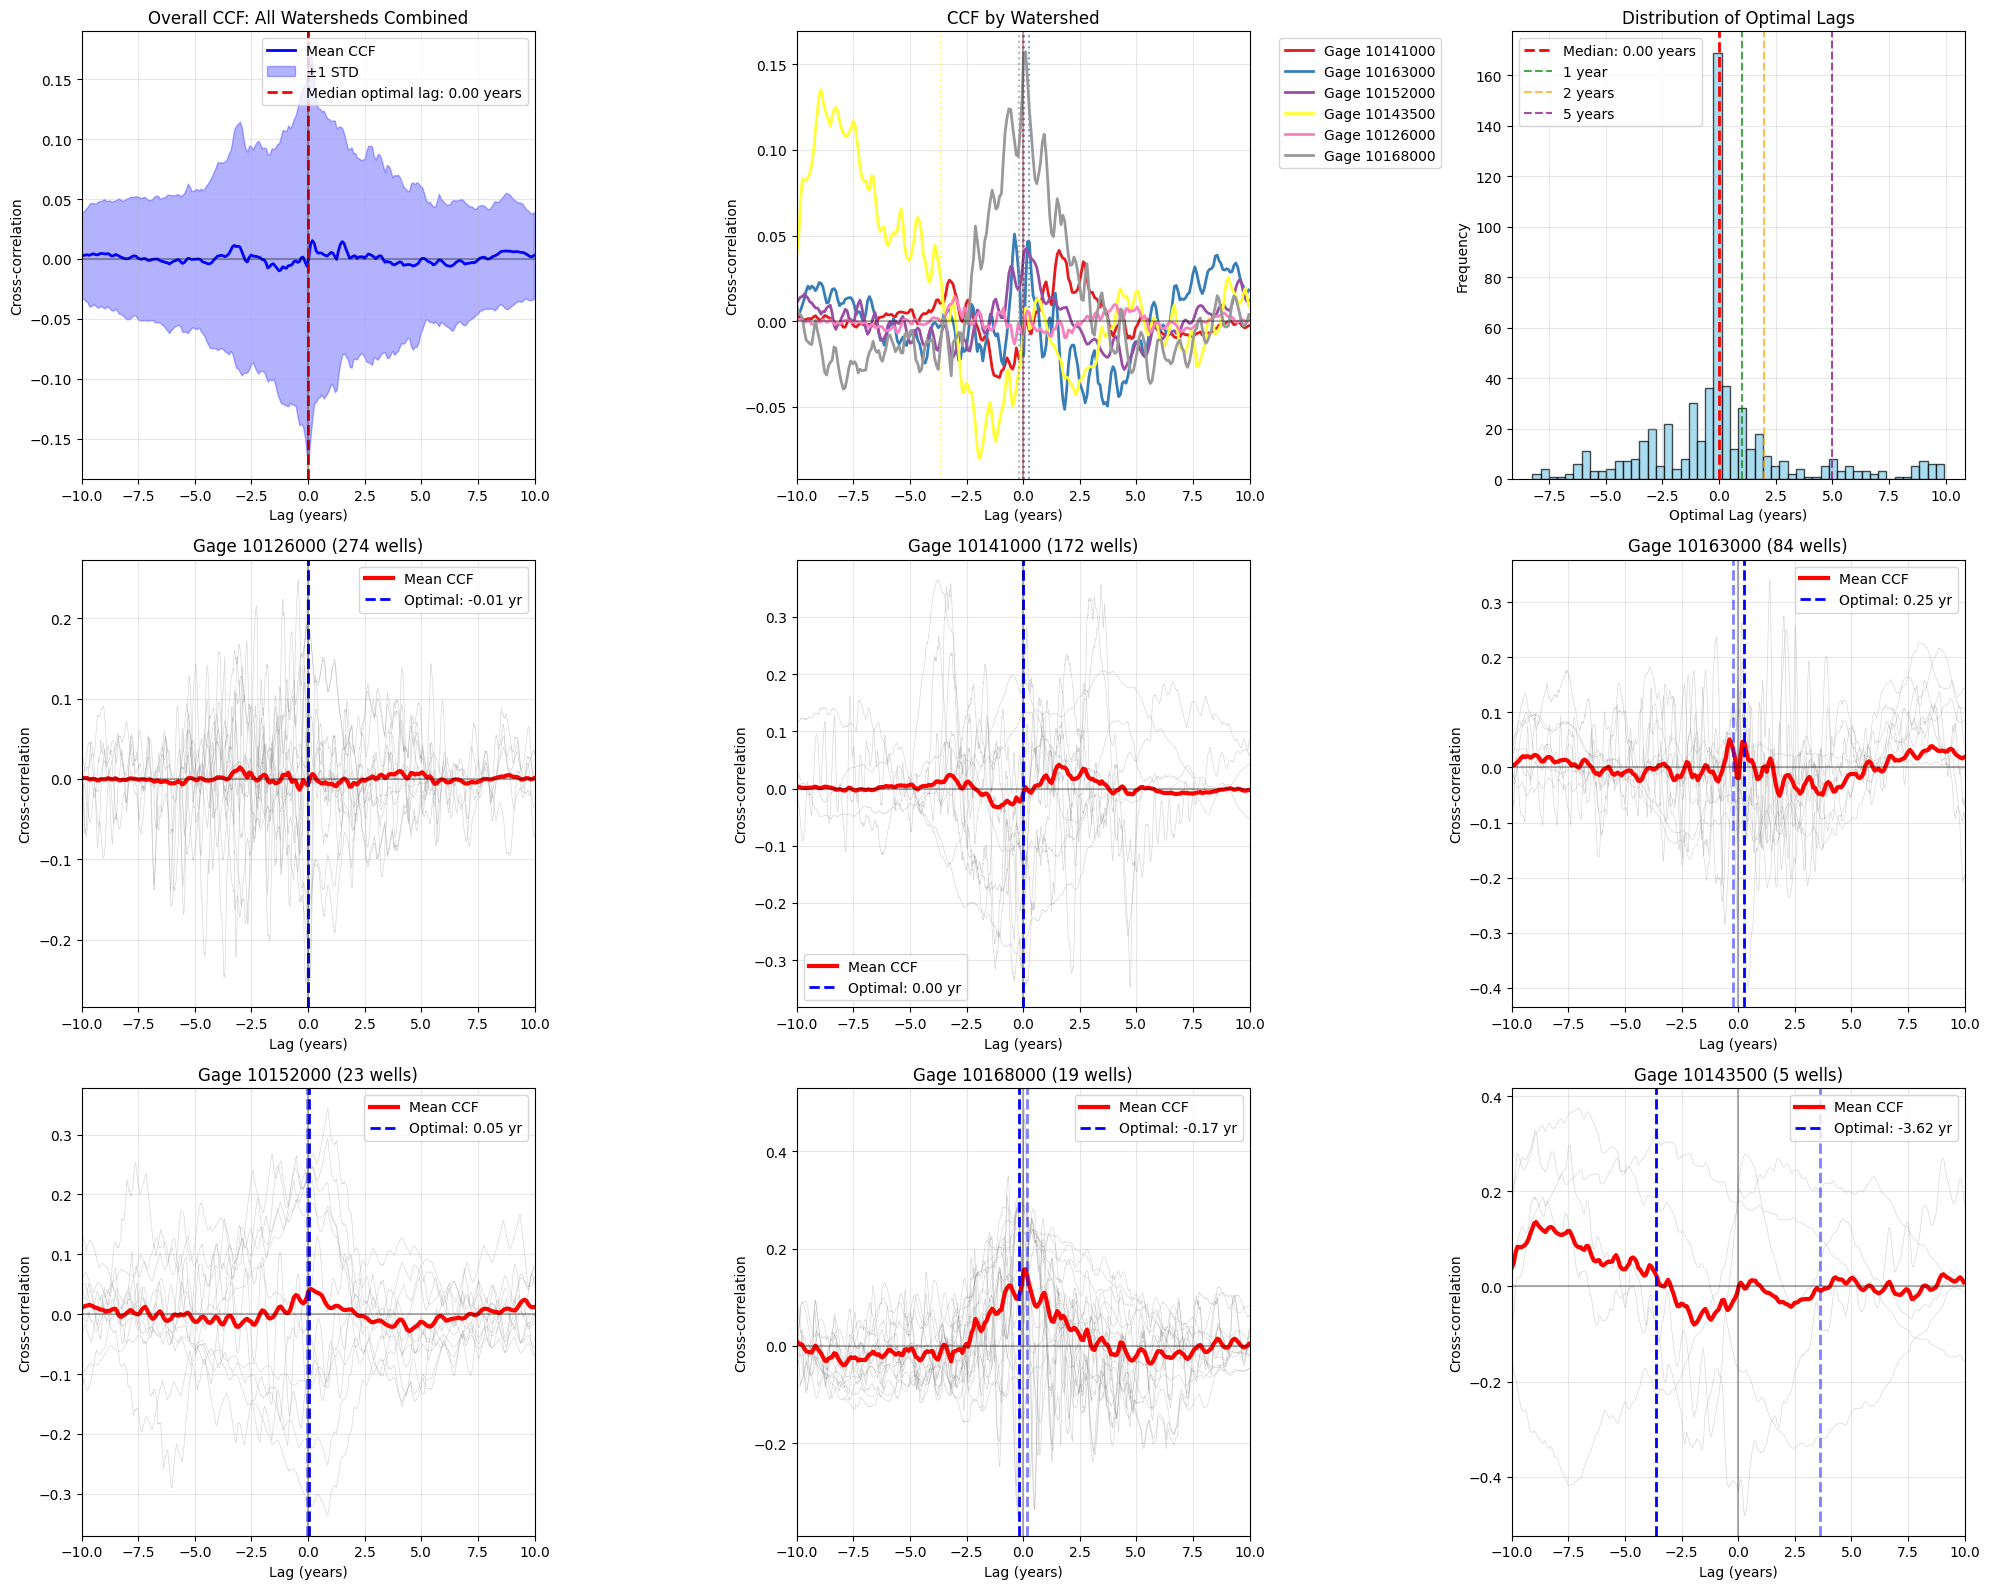

In [19]:
# Create comprehensive correlation vs lag curves
plt.style.use('default')

def plot_correlation_lag_curves(ccf_results_extended, overall_stats, watershed_summary):
    """
    Create comprehensive plots showing correlation vs lag relationships
    """
    
    # Create a large figure with multiple subplots
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Overall correlation vs lag curve (averaged across all wells)
    ax1 = plt.subplot(3, 3, 1)
    
    # Calculate average CCF across all wells
    max_lag_days = 10 * 365
    lag_range = np.arange(-max_lag_days, max_lag_days + 1, 30)  # Every 30 days
    
    # Interpolate all CCF curves to common lag grid
    all_ccf_interpolated = []
    
    for gage_id, wells in ccf_results_extended.items():
        for well_id, result in wells.items():
            # Interpolate to common grid
            ccf_interp = np.interp(lag_range, result['lags'], result['correlation'])
            all_ccf_interpolated.append(ccf_interp)
    
    if all_ccf_interpolated:
        mean_ccf = np.mean(all_ccf_interpolated, axis=0)
        std_ccf = np.std(all_ccf_interpolated, axis=0)
        
        ax1.plot(lag_range / 365.25, mean_ccf, 'b-', linewidth=2, label='Mean CCF')
        ax1.fill_between(lag_range / 365.25, mean_ccf - std_ccf, mean_ccf + std_ccf, 
                        alpha=0.3, color='blue', label='±1 STD')
        
        # Mark overall optimal lag
        optimal_lag_years = overall_stats['median_optimal_lag'] / 365.25
        ax1.axvline(optimal_lag_years, color='red', linestyle='--', linewidth=2,
                   label=f'Median optimal lag: {optimal_lag_years:.2f} years')
        ax1.axvline(-optimal_lag_years, color='red', linestyle='--', linewidth=2, alpha=0.5)
    
    ax1.axhline(0, color='black', linestyle='-', alpha=0.3)
    ax1.axvline(0, color='black', linestyle='-', alpha=0.3)
    ax1.set_xlabel('Lag (years)')
    ax1.set_ylabel('Cross-correlation')
    ax1.set_title('Overall CCF: All Watersheds Combined')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-10, 10)
    
    # 2. Individual watershed CCF curves
    ax2 = plt.subplot(3, 3, 2)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(watershed_summary)))
    
    for i, (gage_id, summary) in enumerate(watershed_summary.items()):
        wells = ccf_results_extended[gage_id]
        
        # Calculate mean CCF for this watershed
        watershed_ccf = []
        for well_id, result in wells.items():
            ccf_interp = np.interp(lag_range, result['lags'], result['correlation'])
            watershed_ccf.append(ccf_interp)
        
        if watershed_ccf:
            mean_watershed_ccf = np.mean(watershed_ccf, axis=0)
            ax2.plot(lag_range / 365.25, mean_watershed_ccf, 
                    color=colors[i], linewidth=2, label=f'Gage {gage_id}')
            
            # Mark watershed optimal lag
            optimal_lag_years = summary['median_optimal_lag'] / 365.25
            ax2.axvline(optimal_lag_years, color=colors[i], linestyle=':', alpha=0.7)
    
    ax2.axhline(0, color='black', linestyle='-', alpha=0.3)
    ax2.axvline(0, color='black', linestyle='-', alpha=0.3)
    ax2.set_xlabel('Lag (years)')
    ax2.set_ylabel('Cross-correlation')
    ax2.set_title('CCF by Watershed')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(-10, 10)
    
    # 3. Distribution of optimal lags
    ax3 = plt.subplot(3, 3, 3)
    
    all_lags_years = np.array(overall_stats['optimal_lags']) / 365.25
    ax3.hist(all_lags_years, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax3.axvline(np.median(all_lags_years), color='red', linestyle='--', linewidth=2,
               label=f'Median: {np.median(all_lags_years):.2f} years')
    ax3.axvline(1, color='green', linestyle='--', label='1 year', alpha=0.7)
    ax3.axvline(2, color='orange', linestyle='--', label='2 years', alpha=0.7)
    ax3.axvline(5, color='purple', linestyle='--', label='5 years', alpha=0.7)
    
    ax3.set_xlabel('Optimal Lag (years)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of Optimal Lags')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4-9. Individual watershed details (top 6 watersheds by number of wells)
    sorted_watersheds = sorted(watershed_summary.items(), 
                              key=lambda x: x[1]['n_wells'], reverse=True)[:6]
    
    for idx, (gage_id, summary) in enumerate(sorted_watersheds):
        ax = plt.subplot(3, 3, 4 + idx)
        
        wells = ccf_results_extended[gage_id]
        
        # Plot individual well CCF curves (sample up to 10 wells)
        well_items = list(wells.items())
        if len(well_items) > 10:
            well_items = well_items[::len(well_items)//10]  # Sample evenly
        
        for well_id, result in well_items:
            ax.plot(result['lags'] / 365.25, result['correlation'], 
                   alpha=0.3, color='gray', linewidth=0.5)
        
        # Plot mean CCF for this watershed
        watershed_ccf = []
        for well_id, result in wells.items():
            ccf_interp = np.interp(lag_range, result['lags'], result['correlation'])
            watershed_ccf.append(ccf_interp)
        
        if watershed_ccf:
            mean_watershed_ccf = np.mean(watershed_ccf, axis=0)
            ax.plot(lag_range / 365.25, mean_watershed_ccf, 
                   color='red', linewidth=3, label='Mean CCF')
            
            # Mark optimal lag
            optimal_lag_years = summary['median_optimal_lag'] / 365.25
            ax.axvline(optimal_lag_years, color='blue', linestyle='--', linewidth=2,
                      label=f'Optimal: {optimal_lag_years:.2f} yr')
            ax.axvline(-optimal_lag_years, color='blue', linestyle='--', 
                      linewidth=2, alpha=0.5)
        
        ax.axhline(0, color='black', linestyle='-', alpha=0.3)
        ax.axvline(0, color='black', linestyle='-', alpha=0.3)
        ax.set_xlabel('Lag (years)')
        ax.set_ylabel('Cross-correlation')
        ax.set_title(f'Gage {gage_id} ({summary["n_wells"]} wells)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-10, 10)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create the comprehensive plots
print("Creating correlation vs lag curves...")
fig_curves = plot_correlation_lag_curves(ccf_results_extended, overall_stats, watershed_summary)

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_ccf_summary(
    ccf_results_extended,
    overall_stats,
    watershed_summary,
    max_lag_years=10,
    save_dir="./figures",
    dpi=300
):
    """
    Plot Figure 1 (Summary):
    - (A) Overall mean CCF with ±1 STD
    - (B) Watershed-level mean CCF overlay
    - (C) Histogram of optimal lags (mean & median lines)

    Saves both PNG and SVG.
    """
    os.makedirs(save_dir, exist_ok=True)

    # Common lag grid (in days) for interpolation and plotting
    max_lag_days = int(max_lag_years * 365)
    lag_range_days = np.arange(-max_lag_days, max_lag_days + 1, 30)  # 30-day step
    lag_range_years = lag_range_days / 365.25

    # ---- Collect interpolated CCFs for overall mean/std ----
    all_ccf_interpolated = []
    for gage_id, wells in ccf_results_extended.items():
        for well_id, result in wells.items():
            # Interpolate each well CCF to the common lag grid
            ccf_interp = np.interp(lag_range_days, result['lags'], result['correlation'])
            all_ccf_interpolated.append(ccf_interp)

    # Prepare Figure 1 (1x3)
    fig = plt.figure(figsize=(20, 6))  # wide aspect for three panels

    # (A) Overall mean CCF
    ax1 = plt.subplot(1, 3, 1)
    if all_ccf_interpolated:
        mean_ccf = np.mean(all_ccf_interpolated, axis=0)
        std_ccf = np.std(all_ccf_interpolated, axis=0)

        ax1.plot(lag_range_years, mean_ccf, linewidth=2, label="Mean CCF")
        ax1.fill_between(lag_range_years, mean_ccf - std_ccf, mean_ccf + std_ccf,
                         alpha=0.3, label="±1 STD")

        # Mark overall median optimal lag
        med_opt_lag_years = overall_stats['median_optimal_lag'] / 365.25
        ax1.axvline(med_opt_lag_years, linestyle="--", linewidth=1.8, label=f"Median optimal lag: {med_opt_lag_years:.2f} yr")

    ax1.axhline(0, color='black', linewidth=1, alpha=0.3)
    ax1.axvline(0, color='black', linewidth=1, alpha=0.3)
    ax1.set_xlim(-max_lag_years, max_lag_years)
    ax1.set_xlabel("Lag (years)")
    ax1.set_ylabel("Cross-correlation")
    ax1.set_title("(A) Overall Mean CCF (All Wells)")
    ax1.legend(loc="best")
    ax1.grid(alpha=0.3)

    # (B) Watershed-level mean CCF overlay
    ax2 = plt.subplot(1, 3, 2)
    if len(watershed_summary) > 0:
        # Build a stable color cycle
        cmap = plt.cm.get_cmap("tab10", len(watershed_summary))
        for i, (gage_id, summary) in enumerate(watershed_summary.items()):
            wells = ccf_results_extended.get(gage_id, {})
            if len(wells) == 0:
                continue

            # Average CCF for this watershed
            ws_ccf_list = []
            for w_id, res in wells.items():
                ccf_interp = np.interp(lag_range_days, res['lags'], res['correlation'])
                ws_ccf_list.append(ccf_interp)
            if len(ws_ccf_list) == 0:
                continue

            ws_mean = np.mean(ws_ccf_list, axis=0)
            ax2.plot(lag_range_years, ws_mean, linewidth=2, label=f"{gage_id}", color=cmap(i))

            # Mark watershed median optimal lag
            med_ws = summary['median_optimal_lag'] / 365.25
            ax2.axvline(med_ws, linestyle=":", linewidth=1.5, color=cmap(i), alpha=0.8)

    ax2.axhline(0, color='black', linewidth=1, alpha=0.3)
    ax2.axvline(0, color='black', linewidth=1, alpha=0.3)
    ax2.set_xlim(-max_lag_years, max_lag_years)
    ax2.set_xlabel("Lag (years)")
    ax2.set_ylabel("Cross-correlation")
    ax2.set_title("(B) Mean CCF by Watershed")
    ax2.legend(title="Gage ID", bbox_to_anchor=(1.02, 1), loc="upper left")
    ax2.grid(alpha=0.3)

    # (C) Histogram of optimal lags (years) with mean/median lines
    ax3 = plt.subplot(1, 3, 3)
    all_lags_years = np.array(overall_stats['optimal_lags']) / 365.25
    if len(all_lags_years) > 0:
        ax3.hist(all_lags_years, bins=50, alpha=0.8, edgecolor='black')
        med = np.median(all_lags_years)
        mean = np.mean(all_lags_years)
        ax3.axvline(med, color='red', linestyle='--', linewidth=2, label=f"Median: {med:.2f} yr")
        ax3.axvline(mean, color='green', linestyle='--', linewidth=2, label=f"Mean: {mean:.2f} yr")

    ax3.set_xlabel("Optimal Lag (years)")
    ax3.set_ylabel("Frequency")
    ax3.set_title("(C) Distribution of Optimal Lags")
    ax3.legend()
    ax3.grid(alpha=0.3)

    plt.tight_layout()

    # Save
    f_png = os.path.join(save_dir, f"CCF_Summary_maxLag{max_lag_years}yr.png")
    f_svg = os.path.join(save_dir, f"CCF_Summary_maxLag{max_lag_years}yr.svg")
    fig.savefig(f_png, dpi=dpi, bbox_inches="tight")
    fig.savefig(f_svg, dpi=dpi, bbox_inches="tight")
    print(f"[Saved] {f_png}\n[Saved] {f_svg}")
    return fig


def plot_ccf_watershed_details(
    ccf_results_extended,
    watershed_summary,
    max_lag_years=10,
    save_dir="./figures",
    dpi=300,
    max_wells_per_panel=10
):
    """
    Plot Figure 2 (Details): 2x3 panels, one per watershed (up to 6).
    Each panel shows:
    - thin gray lines for sampled individual well CCFs,
    - thick red line for the watershed mean CCF,
    - vertical blue dashed line for the watershed median optimal lag.

    Saves both PNG and SVG.
    """
    os.makedirs(save_dir, exist_ok=True)

    # Choose the 6 watersheds with most wells
    top6 = sorted(
        watershed_summary.items(),
        key=lambda x: x[1]['n_wells'],
        reverse=True
    )[:6]

    # Prepare common lag grid
    max_lag_days = int(max_lag_years * 365)
    lag_range_days = np.arange(-max_lag_days, max_lag_days + 1, 30)
    lag_range_years = lag_range_days / 365.25

    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)
    axes = axes.ravel()

    for idx, (gage_id, summary) in enumerate(top6):
        ax = axes[idx]
        wells = ccf_results_extended.get(gage_id, {})
        if len(wells) == 0:
            ax.set_title(f"{gage_id} (no wells)")
            continue

        # Sample up to N wells (evenly) for gray curves
        items = list(wells.items())
        if len(items) > max_wells_per_panel:
            step = max(1, len(items) // max_wells_per_panel)
            items = items[::step]

        ws_ccf_list = []
        # Plot individual wells (light gray)
        for w_id, res in items:
            y = np.interp(lag_range_days, res['lags'], res['correlation'])
            ws_ccf_list.append(y)
            ax.plot(lag_range_years, y, color='gray', alpha=0.35, linewidth=0.6)

        # Mean CCF for the watershed (thick red)
        if len(ws_ccf_list) > 0:
            ws_mean = np.mean(ws_ccf_list, axis=0)
            ax.plot(lag_range_years, ws_mean, color='red', linewidth=2.5, label="Mean CCF")

        # Median optimal lag (blue dashed)
        med_ws = summary['median_optimal_lag'] / 365.25
        ax.axvline(med_ws, color='blue', linestyle='--', linewidth=1.8, label=f"Median lag: {med_ws:.2f} yr")

        ax.axhline(0, color='black', linewidth=1, alpha=0.3)
        ax.axvline(0, color='black', linewidth=1, alpha=0.3)
        ax.set_xlim(-max_lag_years, max_lag_years)
        ax.set_title(f"Gage {gage_id}  (n={summary['n_wells']})")
        ax.grid(alpha=0.3)
        if idx % 3 == 0:
            ax.set_ylabel("Cross-correlation")
        if idx >= 3:
            ax.set_xlabel("Lag (years)")
        ax.legend(loc="best", fontsize=9)

    # If fewer than 6 watersheds, hide extra panels
    for j in range(len(top6), 6):
        axes[j].axis("off")

    plt.tight_layout()

    # Save
    f_png = os.path.join(save_dir, f"CCF_WatershedDetails_maxLag{max_lag_years}yr.png")
    f_svg = os.path.join(save_dir, f"CCF_WatershedDetails_maxLag{max_lag_years}yr.svg")
    fig.savefig(f_png, dpi=dpi, bbox_inches="tight")
    fig.savefig(f_svg, dpi=dpi, bbox_inches="tight")
    print(f"[Saved] {f_png}\n[Saved] {f_svg}")
    return fig


/var/folders/fk/mzjttwrn7rn5nvcfhpgm4mrc0000gq/T/ipykernel_91559/112763201.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(watershed_summary))


[Saved] ../reports/ccf/CCF_Summary_maxLag10yr.png
[Saved] ../reports/ccf/CCF_Summary_maxLag10yr.svg
[Saved] ../reports/ccf/CCF_WatershedDetails_maxLag10yr.png
[Saved] ../reports/ccf/CCF_WatershedDetails_maxLag10yr.svg


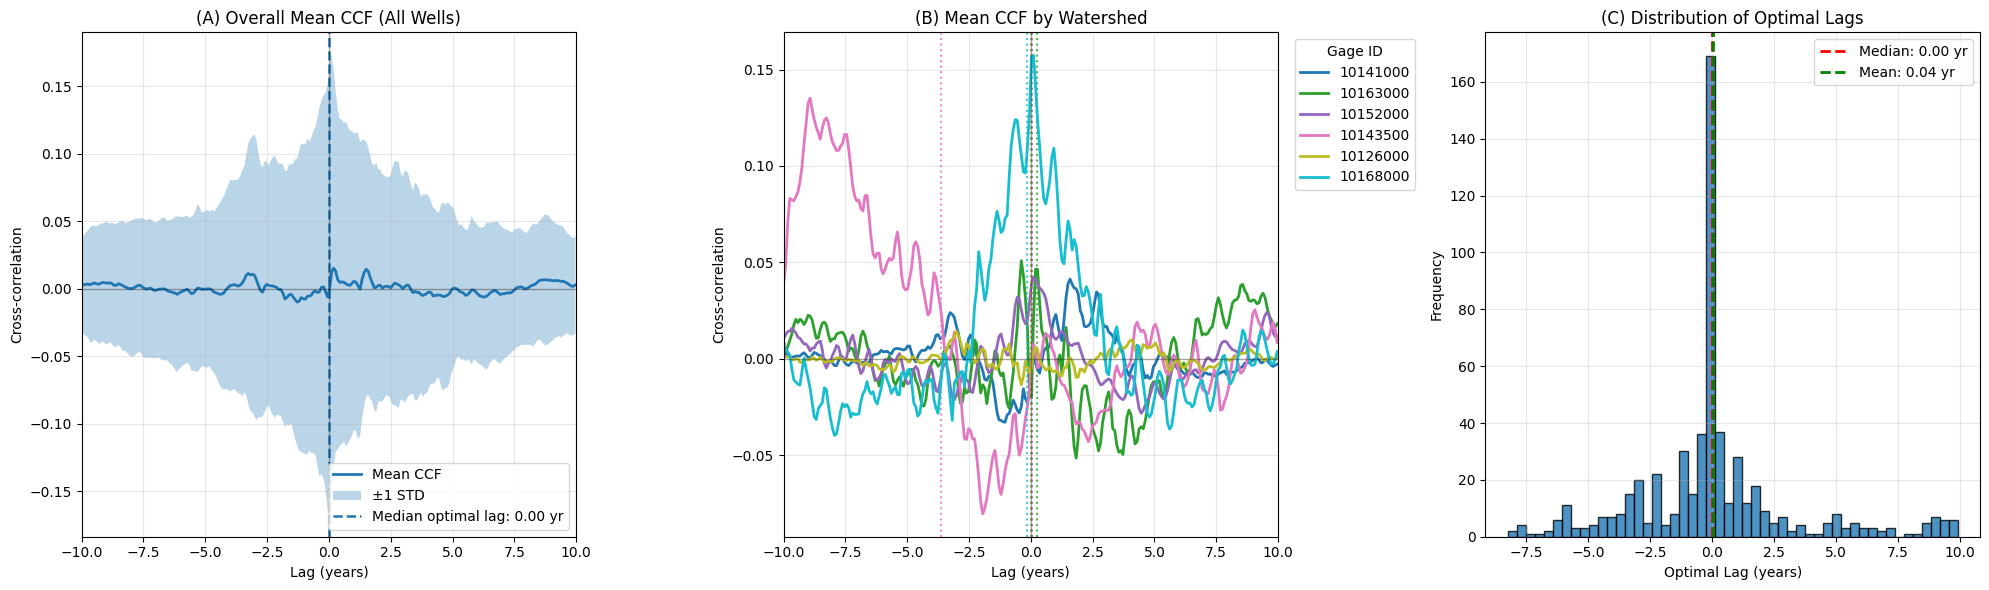

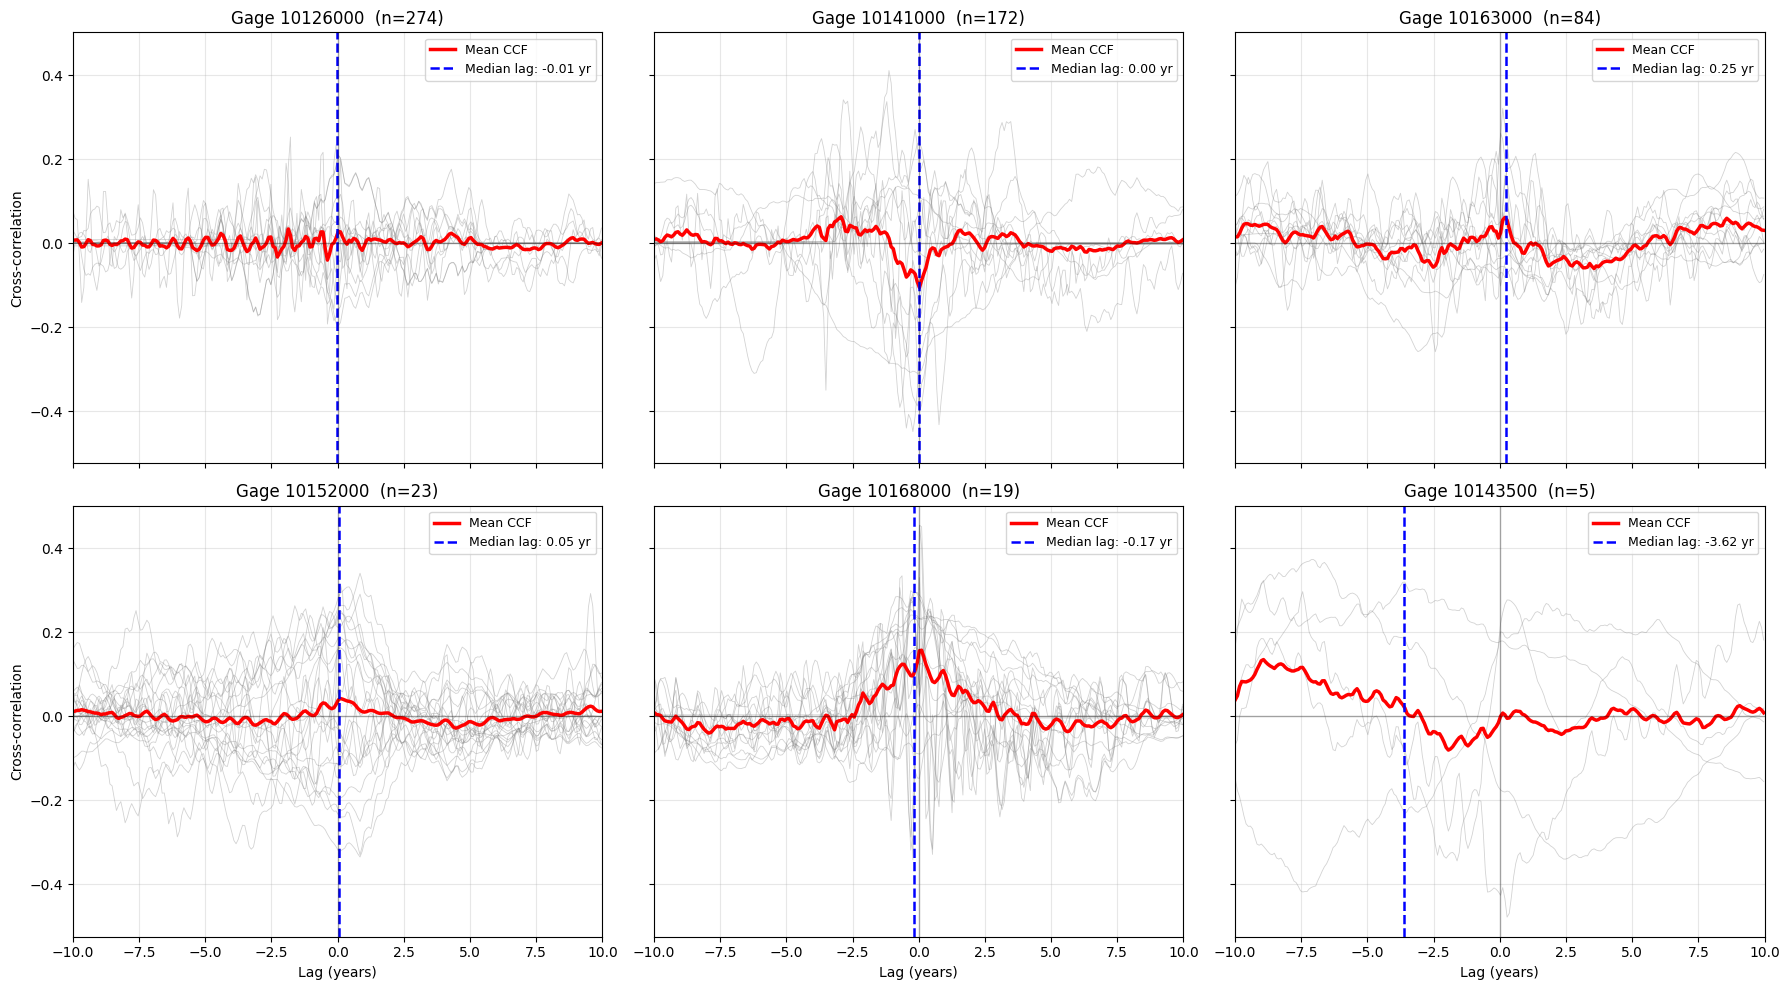

In [22]:
# Figure 1: overall + by-watershed summary (3-panel)
fig1 = plot_ccf_summary(
    ccf_results_extended, overall_stats, watershed_summary,
    max_lag_years=10, save_dir="../reports/ccf", dpi=300
)

# Figure 2: six watersheds detailed (2x3 panels)
fig2 = plot_ccf_watershed_details(
    ccf_results_extended, watershed_summary,
    max_lag_years=10, save_dir="../reports/ccf", dpi=300,
    max_wells_per_panel=12  # you can tune this
)


In [20]:
# Save the extended CCF results
import pickle

# Save detailed extended results
with open('../data/processed/ccf_results_extended_by_watershed.pkl', 'wb') as f:
    pickle.dump(ccf_results_extended, f)

# Save overall statistics
with open('../data/processed/ccf_overall_stats.pkl', 'wb') as f:
    pickle.dump(overall_stats, f)

# Save watershed summary as CSV for easy access
watershed_summary_df = pd.DataFrame.from_dict(
    {k: {
        'gage_id': k,
        'n_wells': v['n_wells'],
        'median_optimal_lag_days': v['median_optimal_lag'],
        'median_optimal_lag_years': v['median_optimal_lag'] / 365.25,
        'mean_optimal_lag_days': v['mean_optimal_lag'],
        'mean_optimal_lag_years': v['mean_optimal_lag'] / 365.25,
        'std_optimal_lag_days': v['std_optimal_lag'],
        'median_max_correlation': v['median_max_corr'],
        'mean_max_correlation': v['mean_max_corr']
    } for k, v in watershed_summary.items()}, 
    orient='index'
)

watershed_summary_df.to_csv('../data/processed/ccf_watershed_summary_extended.csv', index=False)

# Save overall statistics as CSV
overall_df = pd.DataFrame({
    'metric': ['n_wells_total', 'median_optimal_lag_days', 'median_optimal_lag_years',
               'mean_optimal_lag_days', 'mean_optimal_lag_years', 'std_optimal_lag_days',
               'median_max_correlation', 'mean_max_correlation'],
    'value': [overall_stats['n_wells_total'], 
              overall_stats['median_optimal_lag'],
              overall_stats['median_optimal_lag'] / 365.25,
              overall_stats['mean_optimal_lag'],
              overall_stats['mean_optimal_lag'] / 365.25,
              overall_stats['std_optimal_lag'],
              overall_stats['median_max_corr'],
              overall_stats['mean_max_corr']]
})

overall_df.to_csv('../data/processed/ccf_overall_summary.csv', index=False)

print("Extended CCF analysis complete!")
print("Results saved to:")
print("- ../data/processed/ccf_results_extended_by_watershed.pkl (detailed results)")
print("- ../data/processed/ccf_overall_stats.pkl (overall statistics)")
print("- ../data/processed/ccf_watershed_summary_extended.csv (watershed summary)")
print("- ../data/processed/ccf_overall_summary.csv (overall summary)")

print(f"\nKey findings:")
print(f"- Analyzed {overall_stats['n_wells_total']} wells across {len(watershed_summary)} watersheds")
print(f"- Overall median optimal lag: {overall_stats['median_optimal_lag']/365.25:.2f} years")
print(f"- Overall median correlation: {overall_stats['median_max_corr']:.3f}")
print(f"- Lag range analyzed: 0 to 10 years")

Extended CCF analysis complete!
Results saved to:
- ../data/processed/ccf_results_extended_by_watershed.pkl (detailed results)
- ../data/processed/ccf_overall_stats.pkl (overall statistics)
- ../data/processed/ccf_watershed_summary_extended.csv (watershed summary)
- ../data/processed/ccf_overall_summary.csv (overall summary)

Key findings:
- Analyzed 577 wells across 6 watersheds
- Overall median optimal lag: 0.00 years
- Overall median correlation: 0.210
- Lag range analyzed: 0 to 10 years


In [33]:
# Compare basic dataset characteristics across different lag periods
def compare_lag_datasets():
    """
    Compare basic characteristics of datasets generated for different lag periods
    """
    print("=" * 80)
    print("DATASET COMPARISON ACROSS DIFFERENT LAG PERIODS")
    print("=" * 80)
    
    # Define the existing lag datasets
    datasets = {
        'Original': q_buffer2_pair,
        '1 year': lag_analysis_cal,  
        '2 years': lag_2yr,
        '3 years': lag_3yr,
        '6 months': lag_6mo,
        '3 months': lag_3mo
    }
    
    comparison_data = []
    
    for period_name, data in datasets.items():
        # Basic statistics
        n_obs = len(data)
        n_wells = data['well_id'].nunique()
        n_gages = data['gage_id'].nunique()
        
        # Date range
        min_date = data['date'].min()
        max_date = data['date'].max()
        date_span_years = (max_date - min_date).days / 365.25
        
        # Wells per gage statistics
        wells_per_gage = data.groupby('gage_id')['well_id'].nunique()
        
        # Observations per well statistics
        obs_per_well = data.groupby('well_id').size()
        
        # Data loss percentage compared to original dataset
        original_n_obs = len(q_buffer2_pair)
        data_retention = (n_obs / original_n_obs) * 100
        
        comparison_data.append({
            'lag_period': period_name,
            'n_observations': n_obs,
            'n_wells': n_wells,
            'n_gages': n_gages,
            'min_date': min_date.strftime('%Y-%m-%d'),
            'max_date': max_date.strftime('%Y-%m-%d'),
            'date_span_years': date_span_years,
            'wells_per_gage_mean': wells_per_gage.mean(),
            'wells_per_gage_median': wells_per_gage.median(),
            'obs_per_well_mean': obs_per_well.mean(),
            'obs_per_well_median': obs_per_well.median(),
            'obs_per_well_min': obs_per_well.min(),
            'obs_per_well_max': obs_per_well.max(),
            'data_retention_pct': data_retention
        })
        
        print(f"\n{period_name.upper()}:")
        print(f"  Total observations: {n_obs:,}")
        print(f"  Number of wells: {n_wells:,}")
        print(f"  Number of gages: {n_gages}")
        print(f"  Date range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")
        print(f"  Date span: {date_span_years:.1f} years")
        print(f"  Wells per gage: {wells_per_gage.mean():.1f} ± {wells_per_gage.std():.1f} (median: {wells_per_gage.median():.0f})")
        print(f"  Observations per well: {obs_per_well.mean():.0f} ± {obs_per_well.std():.0f} (median: {obs_per_well.median():.0f})")
        print(f"  Obs per well range: {obs_per_well.min()} to {obs_per_well.max()}")
        print(f"  Data retention: {data_retention:.1f}% of original dataset")
        
        # Show distribution of observations per gage
        obs_per_gage = data.groupby('gage_id').size()
        print(f"  Observations per gage: {obs_per_gage.mean():.0f} ± {obs_per_gage.std():.0f}")
    
    return pd.DataFrame(comparison_data)

# Compare all lag datasets
comparison_df = compare_lag_datasets()

DATASET COMPARISON ACROSS DIFFERENT LAG PERIODS

ORIGINAL:
  Total observations: 2,348,083
  Number of wells: 1,096
  Number of gages: 6
  Date range: 1932-08-08 to 2023-11-01
  Date span: 91.2 years
  Wells per gage: 182.7 ± 203.1 (median: 100)
  Observations per well: 2142 ± 2658 (median: 1159)
  Obs per well range: 1 to 19704
  Data retention: 100.0% of original dataset
  Observations per gage: 391347 ± 353714

1 YEAR:
  Total observations: 1,493,879
  Number of wells: 879
  Number of gages: 6
  Date range: 1933-08-08 to 2023-11-01
  Date span: 90.2 years
  Wells per gage: 146.5 ± 155.9 (median: 87)
  Observations per well: 1700 ± 2040 (median: 962)
  Obs per well range: 1 to 15125
  Data retention: 63.6% of original dataset
  Observations per gage: 248980 ± 205667

2 YEARS:
  Total observations: 1,362,752
  Number of wells: 762
  Number of gages: 6
  Date range: 1934-08-08 to 2023-10-26
  Date span: 89.2 years
  Wells per gage: 127.0 ± 144.9 (median: 64)
  Observations per well: 17


SUMMARY TABLE
lag_period  n_observations  n_wells  n_gages   min_date   max_date  date_span_years  wells_per_gage_mean  wells_per_gage_median  obs_per_well_mean  obs_per_well_median  obs_per_well_min  obs_per_well_max  data_retention_pct
  Original         2348083     1096        6 1932-08-08 2023-11-01        91.230664           182.666667                  100.5        2142.411496               1159.0                 1             19704          100.000000
    1 year         1493879      879        6 1933-08-08 2023-11-01        90.231348           146.500000                   87.0        1699.521047                962.0                 1             15125           63.621218
   2 years         1362752      762        6 1934-08-08 2023-10-26        89.215606           127.000000                   64.5        1788.388451                875.0                 1             14474           58.036790
   3 years         1171455      721        6 1935-08-08 2023-11-01        88.232717      

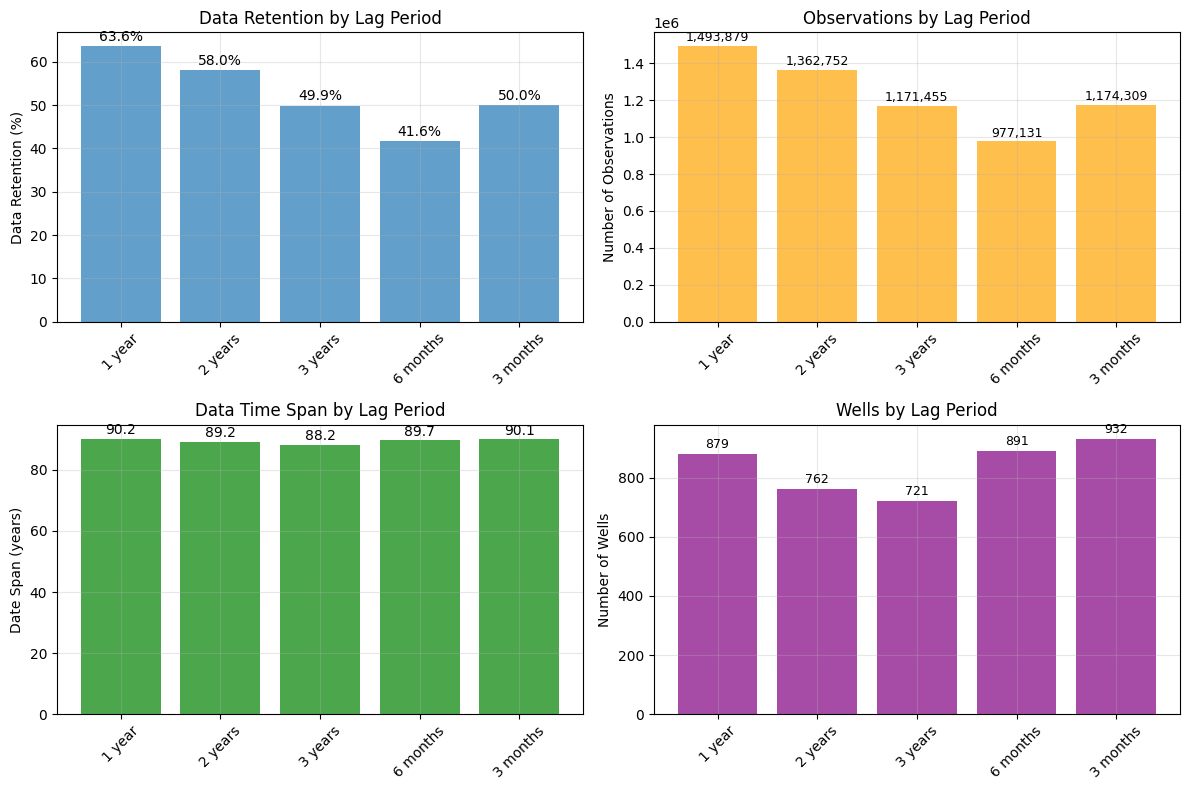


Comparison results saved to: ../data/processed/lag_datasets_comparison.csv


In [34]:
# Display comparison table
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
print(comparison_df.to_string(index=False))

# Save comparison results
comparison_df.to_csv('../data/processed/lag_datasets_comparison.csv', index=False)

# Create visualization of data retention
plt.figure(figsize=(12, 8))

# Plot 1: Data retention by lag period
plt.subplot(2, 2, 1)
lag_periods = comparison_df[comparison_df['lag_period'] != 'Original']['lag_period']
retentions = comparison_df[comparison_df['lag_period'] != 'Original']['data_retention_pct']

bars = plt.bar(range(len(lag_periods)), retentions, alpha=0.7)
plt.xticks(range(len(lag_periods)), lag_periods, rotation=45)
plt.ylabel('Data Retention (%)')
plt.title('Data Retention by Lag Period')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, retentions)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', va='bottom')

# Plot 2: Number of observations by lag period
plt.subplot(2, 2, 2)
n_obs = comparison_df[comparison_df['lag_period'] != 'Original']['n_observations']
bars2 = plt.bar(range(len(lag_periods)), n_obs, alpha=0.7, color='orange')
plt.xticks(range(len(lag_periods)), lag_periods, rotation=45)
plt.ylabel('Number of Observations')
plt.title('Observations by Lag Period')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars2, n_obs)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000, 
             f'{val:,.0f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Date span by lag period
plt.subplot(2, 2, 3)
date_spans = comparison_df[comparison_df['lag_period'] != 'Original']['date_span_years']
bars3 = plt.bar(range(len(lag_periods)), date_spans, alpha=0.7, color='green')
plt.xticks(range(len(lag_periods)), lag_periods, rotation=45)
plt.ylabel('Date Span (years)')
plt.title('Data Time Span by Lag Period')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars3, date_spans)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}', ha='center', va='bottom')

# Plot 4: Number of wells by lag period
plt.subplot(2, 2, 4)
n_wells = comparison_df[comparison_df['lag_period'] != 'Original']['n_wells']
bars4 = plt.bar(range(len(lag_periods)), n_wells, alpha=0.7, color='purple')
plt.xticks(range(len(lag_periods)), lag_periods, rotation=45)
plt.ylabel('Number of Wells')
plt.title('Wells by Lag Period')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars4, n_wells)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{val:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\nComparison results saved to: ../data/processed/lag_datasets_comparison.csv")

# subset

In [44]:
no_lag=pd.read_csv('../data/features/q_buffer2_pair_delta_30m.csv')
no_lag.head()

,well_id,date,wte,gse,gage_id,well_lat,well_lon,gage_lat,gage_lon,wte_meters,q,bfd,delta_wte,delta_q
0,3.946430e+14,1975-01-01,5954.322586,5955.0,10152000,39.778571,-111.487970,40.150232,-111.726039,1814.877524,96.0,1.0,0.000000,0.0
1,4.005100e+14,1975-01-01,4642.123472,4720.0,10152000,40.086067,-111.595474,40.150232,-111.726039,1414.919234,96.0,1.0,0.000000,0.0
2,4.005270e+14,1975-01-01,4595.247928,4622.0,10152000,40.090788,-111.657423,40.150232,-111.726039,1400.631568,96.0,1.0,0.000000,0.0
3,4.005270e+14,1975-01-01,4603.818829,4640.0,10152000,40.090788,-111.660479,40.150232,-111.726039,1403.243979,96.0,1.0,8.570901,0.0
4,4.005280e+14,1975-01-01,4599.508513,4625.0,10152000,40.091066,-111.657423,40.150232,-111.726039,1401.930195,96.0,1.0,0.000000,0.0


In [45]:
# Calculate correlation between delta_q and delta_wte for each well-gage pair
correlation_data = []

for (well_id, gage_id), group in no_lag.groupby(['well_id', 'gage_id']):
    # Remove NaN values
    clean_data = group.dropna(subset=['delta_q', 'delta_wte'])
    
    # Need at least 10 observations for meaningful correlation
    if len(clean_data) >= 10:
        corr = clean_data['delta_q'].corr(clean_data['delta_wte'])
        if not pd.isna(corr):
            correlation_data.append({
                'well_id': well_id,
                'gage_id': gage_id,
                'correlation': corr,
                'abs_correlation': abs(corr),
                'n_observations': len(clean_data)
            })

correlation_df = pd.DataFrame(correlation_data)
print(f"Total well-gage pairs with valid correlations: {len(correlation_df)}")
print(f"Correlation statistics:")
print(correlation_df['correlation'].describe())
print(f"\nAbsolute correlation statistics:")
print(correlation_df['abs_correlation'].describe())

Total well-gage pairs with valid correlations: 111
Correlation statistics:
count    111.000000
mean      -0.007391
std        0.264296
min       -0.728226
25%       -0.133780
50%       -0.010916
75%        0.122198
max        0.742966
Name: correlation, dtype: float64

Absolute correlation statistics:
count    111.000000
mean       0.195328
std        0.177221
min        0.000731
25%        0.058674
50%        0.124665
75%        0.301458
max        0.742966
Name: abs_correlation, dtype: float64


In [46]:
# Calculate percentiles based on absolute correlation values BY GAGE
# For each gage, get the top 10% and top 25% of wells by correlation

top_10_pairs_by_gage = []
top_25_pairs_by_gage = []

for gage_id in correlation_df['gage_id'].unique():
    gage_data = correlation_df[correlation_df['gage_id'] == gage_id]
    
    # Calculate thresholds for this gage
    n_wells = len(gage_data)
    top_10_n = max(1, int(n_wells * 0.1))  # At least 1 well
    top_25_n = max(1, int(n_wells * 0.25))  # At least 1 well
    
    # Get top wells by absolute correlation for this gage
    gage_sorted = gage_data.sort_values('abs_correlation', ascending=False)
    top_10_gage = gage_sorted.head(top_10_n)
    top_25_gage = gage_sorted.head(top_25_n)
    
    top_10_pairs_by_gage.append(top_10_gage)
    top_25_pairs_by_gage.append(top_25_gage)
    
    print(f"Gage {gage_id}:")
    print(f"  Total wells: {n_wells}")
    print(f"  Top 10% wells: {len(top_10_gage)} (threshold: {top_10_gage['abs_correlation'].min():.4f})")
    print(f"  Top 25% wells: {len(top_25_gage)} (threshold: {top_25_gage['abs_correlation'].min():.4f})")

# Combine all gage results
top_10_pairs_combined = pd.concat(top_10_pairs_by_gage, ignore_index=True)
top_25_pairs_combined = pd.concat(top_25_pairs_by_gage, ignore_index=True)

print(f"\nCombined results:")
print(f"Top 10% wells across all gages: {len(top_10_pairs_combined)} pairs")
print(f"Top 25% wells across all gages: {len(top_25_pairs_combined)} pairs")

Gage 10152000:
  Total wells: 8
  Top 10% wells: 1 (threshold: 0.3947)
  Top 25% wells: 2 (threshold: 0.2787)
Gage 10141000:
  Total wells: 2
  Top 10% wells: 1 (threshold: 0.4432)
  Top 25% wells: 1 (threshold: 0.4432)
Gage 10163000:
  Total wells: 79
  Top 10% wells: 7 (threshold: 0.5042)
  Top 25% wells: 19 (threshold: 0.3409)
Gage 10168000:
  Total wells: 22
  Top 10% wells: 2 (threshold: 0.3419)
  Top 25% wells: 5 (threshold: 0.2224)

Combined results:
Top 10% wells across all gages: 11 pairs
Top 25% wells across all gages: 27 pairs


In [47]:
# Create subset datasets by filtering the original no_lag data
# For top 10% correlation pairs (by gage)
top_10_well_gage_pairs = set(zip(top_10_pairs_combined['well_id'], top_10_pairs_combined['gage_id']))
no_lag_top10 = no_lag[no_lag.apply(lambda row: (row['well_id'], row['gage_id']) in top_10_well_gage_pairs, axis=1)].copy()

print(f"Top 10% correlation subset (by gage):")
print(f"  Original data: {len(no_lag):,} observations")
print(f"  Top 10% subset: {len(no_lag_top10):,} observations ({len(no_lag_top10)/len(no_lag)*100:.1f}%)")
print(f"  Wells: {no_lag_top10['well_id'].nunique()}")
print(f"  Gages: {no_lag_top10['gage_id'].nunique()}")

# Save top 10% subset
no_lag_top10.to_csv('../data/features/no_lag_top10_correlation_by_gage.csv', index=False)
print(f"  Saved to: ../data/features/no_lag_top10_correlation_by_gage.csv")

Top 10% correlation subset (by gage):
  Original data: 429,009 observations
  Top 10% subset: 9,288 observations (2.2%)
  Wells: 11
  Gages: 4
  Saved to: ../data/features/no_lag_top10_correlation_by_gage.csv


In [48]:
# For top 25% correlation pairs (by gage)
top_25_well_gage_pairs = set(zip(top_25_pairs_combined['well_id'], top_25_pairs_combined['gage_id']))
no_lag_top25 = no_lag[no_lag.apply(lambda row: (row['well_id'], row['gage_id']) in top_25_well_gage_pairs, axis=1)].copy()

print(f"\nTop 25% correlation subset (by gage):")
print(f"  Original data: {len(no_lag):,} observations")
print(f"  Top 25% subset: {len(no_lag_top25):,} observations ({len(no_lag_top25)/len(no_lag)*100:.1f}%)")
print(f"  Wells: {no_lag_top25['well_id'].nunique()}")
print(f"  Gages: {no_lag_top25['gage_id'].nunique()}")

# Save top 25% subset
no_lag_top25.to_csv('../data/features/no_lag_top25_correlation_by_gage.csv', index=False)
print(f"  Saved to: ../data/features/no_lag_top25_correlation_by_gage.csv")

# Save correlation metadata with gage-specific rankings
top_10_pairs_combined['subset'] = 'top_10_by_gage'
top_25_pairs_combined['subset'] = 'top_25_by_gage'

# Combine and save metadata
correlation_metadata = pd.concat([
    top_10_pairs_combined,
    top_25_pairs_combined[~top_25_pairs_combined.apply(lambda x: (x['well_id'], x['gage_id']), axis=1).isin(
        top_10_pairs_combined.apply(lambda x: (x['well_id'], x['gage_id']), axis=1))]
], ignore_index=True)

correlation_metadata.to_csv('../data/features/correlation_metadata_by_gage.csv', index=False)
print(f"\nCorrelation metadata saved to: ../data/features/correlation_metadata_by_gage.csv")

# Show summary by gage
print(f"\nSummary by gage:")
for gage_id in correlation_df['gage_id'].unique():
    top10_count = len(top_10_pairs_combined[top_10_pairs_combined['gage_id'] == gage_id])
    top25_count = len(top_25_pairs_combined[top_25_pairs_combined['gage_id'] == gage_id])
    total_count = len(correlation_df[correlation_df['gage_id'] == gage_id])
    print(f"  Gage {gage_id}: {top10_count}/{total_count} wells in top 10%, {top25_count}/{total_count} wells in top 25%")


Top 25% correlation subset (by gage):
  Original data: 429,009 observations
  Top 25% subset: 40,543 observations (9.5%)
  Wells: 27
  Gages: 4
  Saved to: ../data/features/no_lag_top25_correlation_by_gage.csv

Correlation metadata saved to: ../data/features/correlation_metadata_by_gage.csv

Summary by gage:
  Gage 10152000: 1/8 wells in top 10%, 2/8 wells in top 25%
  Gage 10141000: 1/2 wells in top 10%, 1/2 wells in top 25%
  Gage 10163000: 7/79 wells in top 10%, 19/79 wells in top 25%
  Gage 10168000: 2/22 wells in top 10%, 5/22 wells in top 25%
